# World Happiness Report - Data Exploration

This dataset contains a survey of the state of global happiness. 

## Columns

- `Country`: Name of the country
- `Region`: Region the country belongs to.
- `Happiness Rank`: Rank of the country based on the Happiness score.
- `Happiness Score`: Metric based on the question: How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest?
- `Standard Error`: The standard error of the happiness score.
- `Economy (GDP per Capita)`: The extent to which GDP contributes to the calculation of the Happiness Score.
- `Family`: The extent to which Family contributes to the calculation of the Happiness Score.
- `Health (Life Expectancy)`: The extent to which Life expectancy contributed to the calculation of the Happiness Score.
- `Freedom`: The extent to which Freedom contributed to the calculation of the Happiness Score.
- `Trust (Government Corruption)`: The extent to which Perception of Corruption contributes to Happiness Score.
- `Generosity`: The extent to which Generosity contributed to the calculation of the Happiness Score.
- `Dystopia Residual`: The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

In [1]:
!ls -lh ./../datasets/world-happiness-report/

total 248
-rwxr-xr-x@ 1 johnjairo  staff    16K Jun 14  2017 2015.csv
-rwxr-xr-x@ 1 johnjairo  staff    17K Jun 14  2017 2016.csv
-rwxr-xr-x@ 1 johnjairo  staff    29K Jun 14  2017 2017.csv
-rw-r--r--  1 johnjairo  staff   7.6K Jul 16 09:02 output2015.csv
-rw-r--r--  1 johnjairo  staff   7.6K Jul 16 09:02 output2016.csv
-rw-r--r--  1 johnjairo  staff   8.6K Jul 16 09:02 output2017.csv
-rw-r--r--  1 johnjairo  staff    24K Jul 18 22:06 world-happiness-report.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

Reading the contents of the world happiness report for 2015, 2016 and 2017.

In [3]:
data_path = "./../datasets/world-happiness-report/"
d_2015 = pd.read_csv(f"{data_path}2015.csv")
d_2016 = pd.read_csv(f"{data_path}2016.csv")
d_2017 = pd.read_csv(f"{data_path}2017.csv")

In [4]:
d_2016.head(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


## Analyzing data by region in 2015

A region to region comparison of the _Happiness Score_ in 2015.

In [5]:
regions = list(d_2015['Region'].unique())
regions.sort()
score_by_region_dict = {}

for region in regions:
    mask = d_2015['Region'].str.contains(str(region))
    score_by_region_dict[region] = d_2015[mask]['Happiness Score']

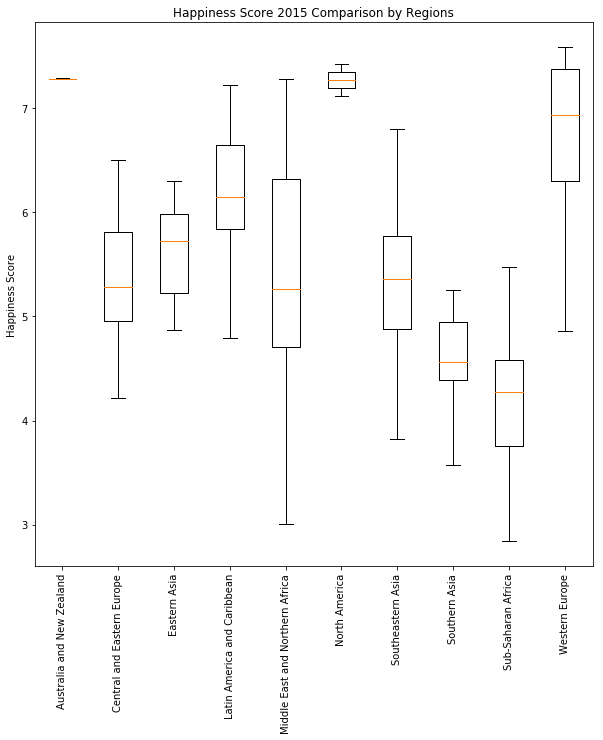

In [6]:
data = list(score_by_region_dict.values())
labels = list(score_by_region_dict.keys())

plt.figure(figsize = (10,10))
plt.boxplot(data, labels=labels, showfliers=False)
plt.ylabel('Happiness Score')
plt.xticks(rotation='vertical')
plt.title('Happiness Score 2015 Comparison by Regions')
plt.show()

# Creating a dataset for all years

From these input files, we want to create one output file `world-happiness-report.csv` that contains the following columns:

- `country`
- `region`
- `happiness_score`
- `year`

In order to do this, we have to join all three dataframes into one, and rename the columns according to this definition.

## Pre-processing the 2015 dataset

Given that all the datasets have different names for the columns, we will start by standarizing each dataset.

In [7]:
d_2015.axes

[RangeIndex(start=0, stop=158, step=1),
 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
        'Standard Error', 'Economy (GDP per Capita)', 'Family',
        'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
        'Generosity', 'Dystopia Residual'],
       dtype='object')]

In [8]:
out_2015 = d_2015[['Country', 'Region', 'Happiness Score']]
out_2015.insert(3, 'year', 2015)
out_2015 = out_2015.rename(index=str,
                           columns={'Country':'country', 
                                    'Region':'region', 
                                    'Happiness Score':'happiness_score'})
out_2015.head(5)

,country,region,happiness_score,year
0,Switzerland,Western Europe,7.587,2015
1,Iceland,Western Europe,7.561,2015
2,Denmark,Western Europe,7.527,2015
3,Norway,Western Europe,7.522,2015
4,Canada,North America,7.427,2015


## Pre-processing the 2016 dataset

In [9]:
d_2016.axes

[RangeIndex(start=0, stop=157, step=1),
 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
        'Lower Confidence Interval', 'Upper Confidence Interval',
        'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity',
        'Dystopia Residual'],
       dtype='object')]

In [10]:
out_2016 = d_2016[['Country', 'Region', 'Happiness Score']]
out_2016.insert(3, 'year', 2016)
out_2016 = out_2016.rename(index=str,
                           columns={'Country':'country', 
                                    'Region':'region', 
                                    'Happiness Score':'happiness_score'})
out_2016.head(5)

,country,region,happiness_score,year
0,Denmark,Western Europe,7.526,2016
1,Switzerland,Western Europe,7.509,2016
2,Iceland,Western Europe,7.501,2016
3,Norway,Western Europe,7.498,2016
4,Finland,Western Europe,7.413,2016


## Pre-processing the 2017 dataset

In [11]:
d_2017.axes

[RangeIndex(start=0, stop=155, step=1),
 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
        'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
        'Health..Life.Expectancy.', 'Freedom', 'Generosity',
        'Trust..Government.Corruption.', 'Dystopia.Residual'],
       dtype='object')]

In [12]:
out_2017 = d_2017[['Country', 'Happiness.Score']]
out_2017.insert(2, 'year', 2017)
out_2017 = out_2017.rename(index=str,
                           columns={'Country':'country', 
                                    'Happiness.Score':'happiness_score'})
out_2017.head(5)

,country,happiness_score,year
0,Norway,7.537,2017
1,Denmark,7.522,2017
2,Iceland,7.504,2017
3,Switzerland,7.494,2017
4,Finland,7.469,2017


In [13]:
print(f"The 2015 file has {len(out_2015)} records")
print(f"The 2016 file has {len(out_2016)} records")

The 2015 file has 158 records
The 2016 file has 157 records


In [14]:
out_2017_extended = out_2017.merge(out_2015, on='country', how='left', suffixes=['','2015'])
out_2017_extended.head(5)

,country,happiness_score,year,region,happiness_score2015,year2015
0,Norway,7.537,2017,Western Europe,7.522,2015.0
1,Denmark,7.522,2017,Western Europe,7.527,2015.0
2,Iceland,7.504,2017,Western Europe,7.561,2015.0
3,Switzerland,7.494,2017,Western Europe,7.587,2015.0
4,Finland,7.469,2017,Western Europe,7.406,2015.0


In [15]:
out_2017 = out_2017_extended[['country', 'region', 'happiness_score', 'year']]
out_2017.head(5)

,country,region,happiness_score,year
0,Norway,Western Europe,7.537,2017
1,Denmark,Western Europe,7.522,2017
2,Iceland,Western Europe,7.504,2017
3,Switzerland,Western Europe,7.494,2017
4,Finland,Western Europe,7.469,2017


## Joining the three datasets into one

We join all three datasets and export the result as csv.

In [16]:
out_all = pd.concat([out_2015, out_2016, out_2017], ignore_index=True)
print(f"Total number of records is {len(out_all)}")
out_all.head(5)

Total number of records is 470


,country,region,happiness_score,year
0,Switzerland,Western Europe,7.587,2015
1,Iceland,Western Europe,7.561,2015
2,Denmark,Western Europe,7.527,2015
3,Norway,Western Europe,7.522,2015
4,Canada,North America,7.427,2015


In [19]:
!mkdir ./../datasets/results
result_file = f"./../datasets/results/world-happiness-report.json"
out_all.to_json(result_file, orient='records')

mkdir: ./../datasets/results: File exists


# Conclusion

From these three files, the information for `country`, `region`, `happiness_score` and `year` was selected. 
The names of the columns were adjusted and the information of the `region` was added when needed. Also, a small exploration of the data for 2015 was done and a graph showing the results was presented.